<font size="3"><b> <p style="text-align: center;"> PUC MG - Pontifícia Universidade Católica de Minas Gerais</p> </b></font>

<font size="5"><b> <p style="text-align: center;"> Pós Graduação Lato Sensu em Ciência de Dados e Big Data</p> </b></font>

<font size="4"><b> <p style="text-align: center;"> Trabalho de conclusão de curso</p> </b></font>

<font size="4"><b> Título:</b> Modelo de Predição de Sucesso de Startups</font>     
<font size="4"><b> Aluna:</b> Heloisa Senarese Mininel</font>

**Notebook 1:** Análise exploratória de dados

Para o desenvolvimento deste trabalho foram utilizados os datasets disponíveis em:     
https://www.kaggle.com/justinas/startup-investments     
https://www.kaggle.com/kaustubh93/list-of-700-unicorn-companies-across-the-globe

**1. Importando as bibliotecas**

In [2]:
import pandas as pd 
import csv 
import numpy as np 
from matplotlib import * 
import matplotlib.pyplot as plt
from datetime import datetime
import pylab as pl 
import seaborn as sns 
import json
import plotly.graph_objs as go
import plotly.express as px
from collections import Counter
import plotly.express as px


In [3]:
## For outliers detection
from sklearn import preprocessing, svm

## For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [4]:
import warnings
warnings.filterwarnings('ignore')

**2. Carregando os dados**

In [5]:
#Leitura dos dados

objects = pd.read_csv('objects.csv', low_memory=False)
degrees = pd.read_csv('degrees.csv')
funding_rounds = pd.read_csv('funding_rounds.csv')
investments = pd.read_csv('investments.csv')
offices = pd.read_csv('offices.csv')
people = pd.read_csv('people.csv')
unicornies = pd.read_csv('unicornies.csv')

**3. Organizando o dataframe principal e checando os dados**

In [6]:
#Criando o dataframe

df_objects = objects[['id', 'entity_type', 'entity_id', 'name', 'category_code', 'status', 'founded_at', 
                      'closed_at', 'description', 'country_code', 'state_code', 'city', 'region', 
                      'first_investment_at', 'last_investment_at', 'investment_rounds', 'invested_companies', 
                      'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 
                      'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships']]

In [7]:
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   name                 462649 non-null  object 
 4   category_code        123186 non-null  object 
 5   status               462651 non-null  object 
 6   founded_at           100441 non-null  object 
 7   closed_at            2809 non-null    object 
 8   description          95005 non-null   object 
 9   country_code         95043 non-null   object 
 10  state_code           54760 non-null   object 
 11  city                 90684 non-null   object 
 12  region               462651 non-null  object 
 13  first_investment_at  16956 non-null   object 
 14  last_investment_at   16956 non-null   object 
 15  investment_rounds

In [8]:
#Checando se o id da objects é único

df_objects['id'].duplicated().sum()

0

In [11]:
#Checando campos nulos 

print(df_objects.isnull().sum()* 100 / len(df_objects))

id                      0.000000
entity_type             0.000000
entity_id               0.000000
name                    0.000432
category_code          73.373882
status                  0.000000
founded_at             78.290115
closed_at              99.392847
description            79.465083
country_code           79.456869
state_code             88.163864
city                   80.399048
region                  0.000000
first_investment_at    96.335034
last_investment_at     96.335034
investment_rounds       0.000000
invested_companies      0.000000
first_funding_at       93.189899
last_funding_at        93.189899
funding_rounds          0.000000
funding_total_usd       0.000000
first_milestone_at     78.308055
last_milestone_at      78.308055
milestones              0.000000
relationships           0.000000
dtype: float64


In [11]:
#Checando valores nulos no campo "closed" para startups com status fechado

df_nulls_closed = df_objects[df_objects['status']=='closed']

print(df_nulls_closed['closed_at'].isnull().sum())


0


In [10]:
df_objects.drop(['first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at',
                'first_milestone_at', 'last_milestone_at'], axis=1)

id entity_type  entity_id  \
0           c:1     Company          1   
1          c:10     Company         10   
2         c:100     Company        100   
3       c:10000     Company      10000   
4       c:10001     Company      10001   
...         ...         ...        ...   
462646   r:9995     Product       9995   
462647   r:9996     Product       9996   
462648   r:9997     Product       9997   
462649   r:9998     Product       9998   
462650   r:9999     Product       9999   

                                                     name    category_code  \
0                                                Wetpaint              web   
1                                                 Flektor      games_video   
2                                                   There      games_video   
3                                                 MYWEBBO  network_hosting   
4                                      THE Movie Streamer      games_video   
...                                                   ...              ...   
462646              SiteLink, listing feed for Brokerages              NaN   
462647  EDCLink, listing feed for Economic Development...              NaN   
462648                   Cmail, broadcast email marketing              NaN   
462649                      CatylistCRM, contact database              NaN   
462650                   Catylist Custom Print/Web Design              NaN   

           status  founded_at closed_at                  description  \
0       operating  2005-10-17       NaN  Technology Platform Company   
1        acquired         NaN       NaN                          NaN   
2        acquired         NaN       NaN                          NaN   
3       operating  2008-07-26       NaN                          NaN   
4       operating  2008-07-26       NaN                          NaN   
...           ...         ...       ...                          ...   
462646  operating         NaN       NaN                          NaN   
462647  operating         NaN       NaN                          NaN   
462648  operating         NaN       NaN                          NaN   
462649  operating         NaN       NaN                          NaN   
462650  operating         NaN       NaN                          NaN   

       country_code state_code         city       region  investment_rounds  \
0               USA         WA      Seattle      Seattle                  0   
1               USA         CA  Culver City  Los Angeles                  0   
2               USA         CA    San Mateo       SF Bay                  0   
3               NaN        NaN          NaN      unknown                  0   
4               NaN        NaN          NaN      unknown                  0   
...             ...        ...          ...          ...                ...   
462646          NaN        NaN          NaN      unknown                  0   
462647          NaN        NaN          NaN      unknown                  0   
462648          NaN        NaN          NaN      unknown                  0   
462649          NaN        NaN          NaN      unknown                  0   
462650          NaN        NaN          NaN      unknown                  0   

        invested_companies  funding_rounds  funding_total_usd  milestones  \
0                        0               3         39750000.0           5   
1                        0               0                0.0           0   
2                        0               0                0.0           4   
3                        0               0                0.0           0   
4                        0               0                0.0           0   
...                    ...             ...                ...         ...   
462646                   0               0                0.0           0   
462647                   0               0                0.0           0   
462648                   0               0                0.0   

**4. Análises**

1) Número de startups por região   
2) Número de startups por categoria     
3) Número de startups por número de relacionamentos

4) Mapa com a localização/concentração de escritórios   
5) Número de escritórios

6) People: # por universidade    
7) Número de funcionários 
     
8) Funil: quantos passaram pra seed, séries, etc         
9) % operando, fechada, adquirida

**4.1, 4.2 e 4.3 Startups por região, categoria e relacionamentos**

In [12]:
def visualization(df, x, y, n, r, order):
    df = df.groupby(df[x])[y].count().reset_index().rename(columns={y: 'qty'}).sort_values(by=order, 
                                                                                           ascending=False)
    df.index = df[x]
    df['Pareto'] = 100 *df.qty.cumsum() / df.qty.sum()
    df = df.nlargest(n, 'qty')
    
    fig, axes = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    
    ax1 = df.plot(use_index=True, y='qty',  kind='bar', ax=axes)
    ax2 = df.plot(use_index=True, y='Pareto', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
    
    
    fig.set_size_inches(18.5, 10.5)
    
    ax1.tick_params('x', labelrotation=r)
    ax2.set_ylim([0,110])
    
    for p, label in zip(ax1.patches, df['qty']):
        ax1.annotate(label, (p.get_x(), p.get_height()), textcoords="offset points", xytext=(0,10), ha='center')
    

In [13]:
startups_country = df_objects[['id', 'country_code']]

startups_c = startups_country.groupby(startups_country['country_code'])['id'].count().reset_index().rename(columns={"id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['country_code']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')



country_code    qty     Pareto
country_code                               
USA                   USA  55584  58.483002
GBR                   GBR   7957  66.855002
IND                   IND   4057  71.123597
CAN                   CAN   4005  75.337479
DEU                   DEU   2157  77.606978
FRA                   FRA   1874  79.578717
AUS                   AUS   1542  81.201141
ESP                   ESP   1189  82.452153
ISR                   ISR   1184  83.697905
IRL                   IRL   1113  84.868954
NLD                   NLD    955  85.873762
CHN                   CHN    820  86.736530
SWE                   SWE    782  87.559315
ITA                   ITA    684  88.278990
FIN                   FIN    615  88.926065
CHE                   CHE    608  89.565775
SGP                   SGP    591  90.187599
BRA                   BRA    582  90.799954
JPN                   JPN    538  91.366013
RUS                   RUS    494  91.885778

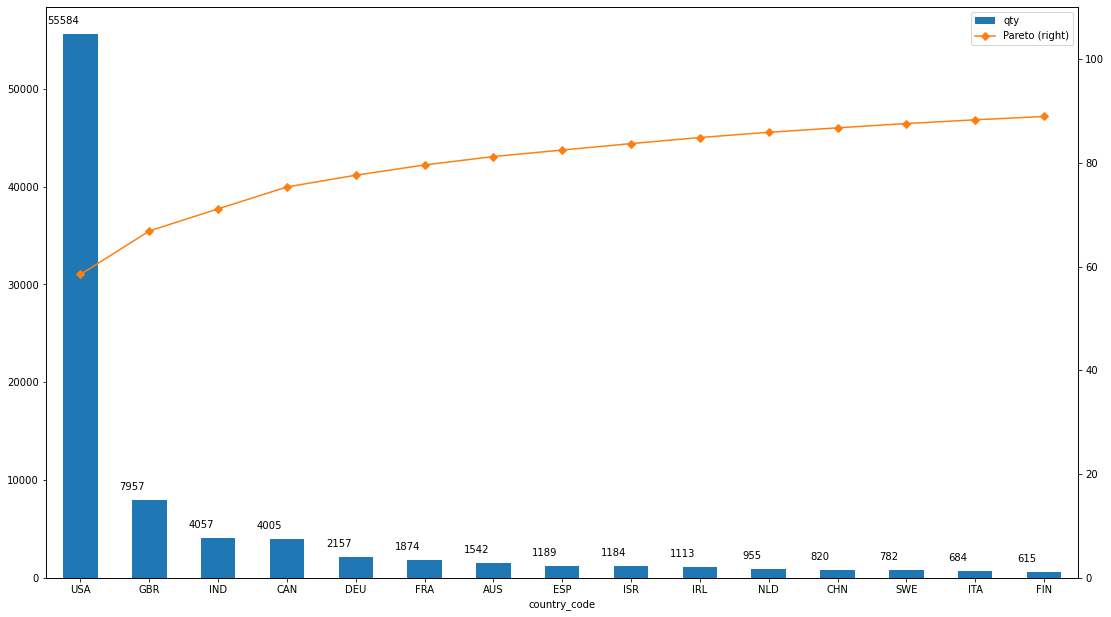

In [14]:
startups = df_objects[['id', 'country_code']]

visualization(startups, x='country_code', y='id', n=15, r=0, order='qty')

In [15]:
startups_state = df_objects[['id', 'state_code']]

startups_c = startups_state.groupby(startups_state['state_code'])['id'].count().reset_index().rename(columns={"id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['state_code']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')


state_code    qty     Pareto
state_code                             
CA                 CA  17537  32.025201
NY                 NY   6412  43.734478
MA                 MA   3219  49.612856
TX                 TX   3006  55.102264
FL                 FL   2247  59.205625
WA                 WA   1984  62.828707
IL                 IL   1922  66.338568
PA                 PA   1439  68.966399
NJ                 NJ   1251  71.250913
CO                 CO   1247  73.528123
VA                 VA   1228  75.770636
GA                 GA   1205  77.971147
NC                 NC    909  79.631118
MD                 MD    844  81.172389
OH                 OH    824  82.677137
AZ                 AZ    790  84.119795
MI                 MI    706  85.409058
MN                 MN    704  86.694668
CT                 CT    660  87.899927
OR                 OR    616  89.024836

In [16]:
startups = df_objects[['id', 'category_code']]

startups_c = startups.groupby(startups['category_code'])['id'].count().reset_index().rename(columns={"id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['category_code']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')


category_code    qty     Pareto
category_code                                       
software                  software  17922  14.548731
web                            web  15118  26.821230
other                        other  13617  37.875246
ecommerce                ecommerce   9065  45.234036
games_video            games_video   7520  51.338626
mobile                      mobile   6862  56.909064
advertising            advertising   6098  61.859302
consulting              consulting   5006  65.923076
enterprise              enterprise   4441  69.528193
biotech                    biotech   4430  73.124381
hardware                  hardware   2951  75.519945
education                education   2901  77.874921
public_relations  public_relations   2846  80.185248
network_hosting    network_hosting   2350  82.092933
search                      search   2182  83.864238
cleantech                cleantech   1940  85.439092
health                      health   1698  86.817495
finance                    finance   1386  87.942623
social                      social   1310  89.006056
security                  security   1171  89.956651

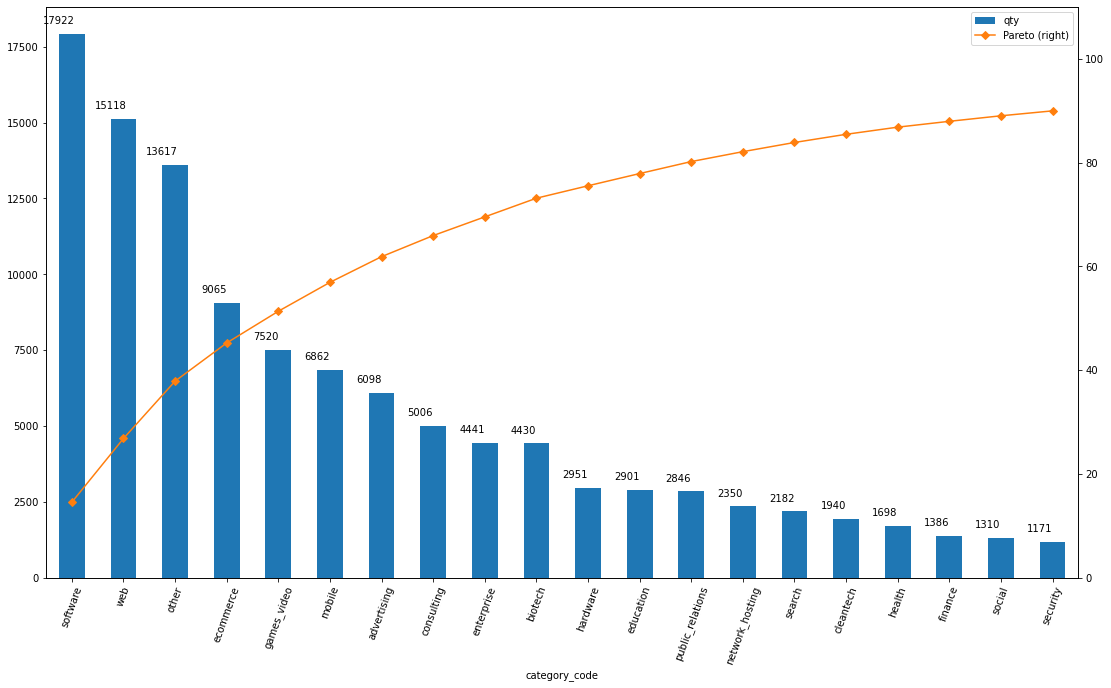

In [17]:
startups = df_objects[['id', 'category_code']]


visualization(startups, x='category_code', y='id', n=20, r=70, order='qty')


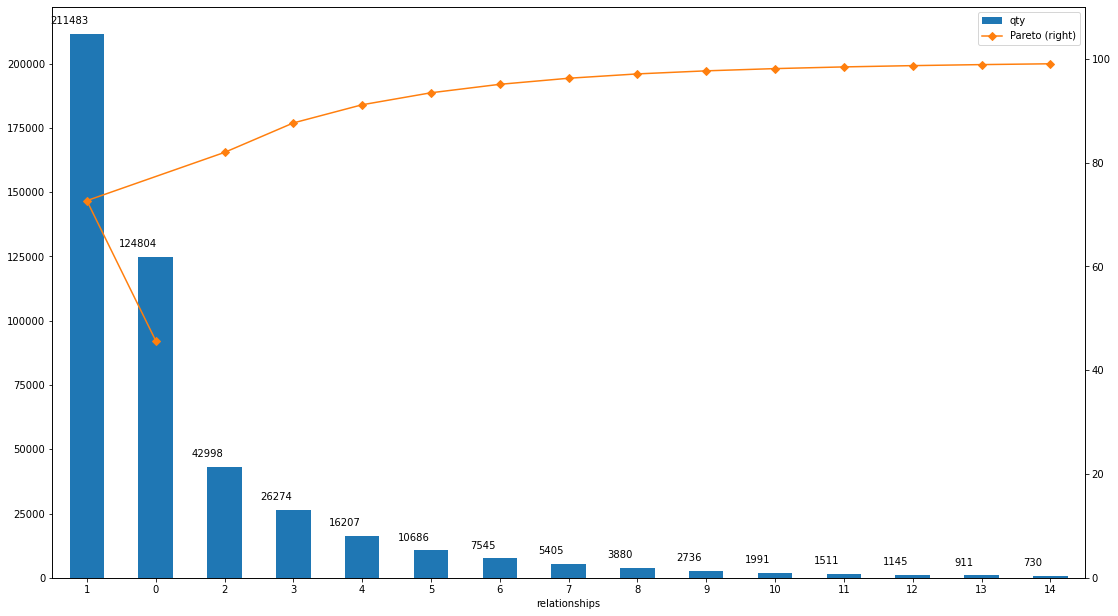

In [18]:
startups = df_objects[['id', 'relationships']]

visualization(startups, x=str('relationships'), y='id', n=15, r=0, order='qty')


**4.4 e 4.5 Análises sobre os escritórios**

In [19]:
#Checando valores nulos
print(offices.isnull().sum())

id                   0
object_id            0
office_id            0
description      44188
region               0
address1         18288
address2         68198
city              5168
zip_code         19488
state_code       50701
country_code         0
latitude             0
longitude            0
created_at      112718
updated_at      112718
dtype: int64


In [20]:
offices = offices[['id', 'object_id', 'office_id', 'region', 'country_code']]

In [21]:
offices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112718 entries, 0 to 112717
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            112718 non-null  int64 
 1   object_id     112718 non-null  object
 2   office_id     112718 non-null  int64 
 3   region        112718 non-null  object
 4   country_code  112718 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.3+ MB


In [22]:
#Checando valores nulos novamente
print(offices.isnull().sum())

id              0
object_id       0
office_id       0
region          0
country_code    0
dtype: int64


In [23]:
df = offices.groupby(['country_code'])['office_id'].count().reset_index(name='number_offices')

fig = px.choropleth(df, locations="country_code", color="number_offices",
                           color_continuous_scale="YlGnBu",
                           range_color=(0, 10000),
                           scope="world",
                           labels={'"number_offices"':'"number_offices"'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#lat / long não tá mto correta, então preferi não utilizar.

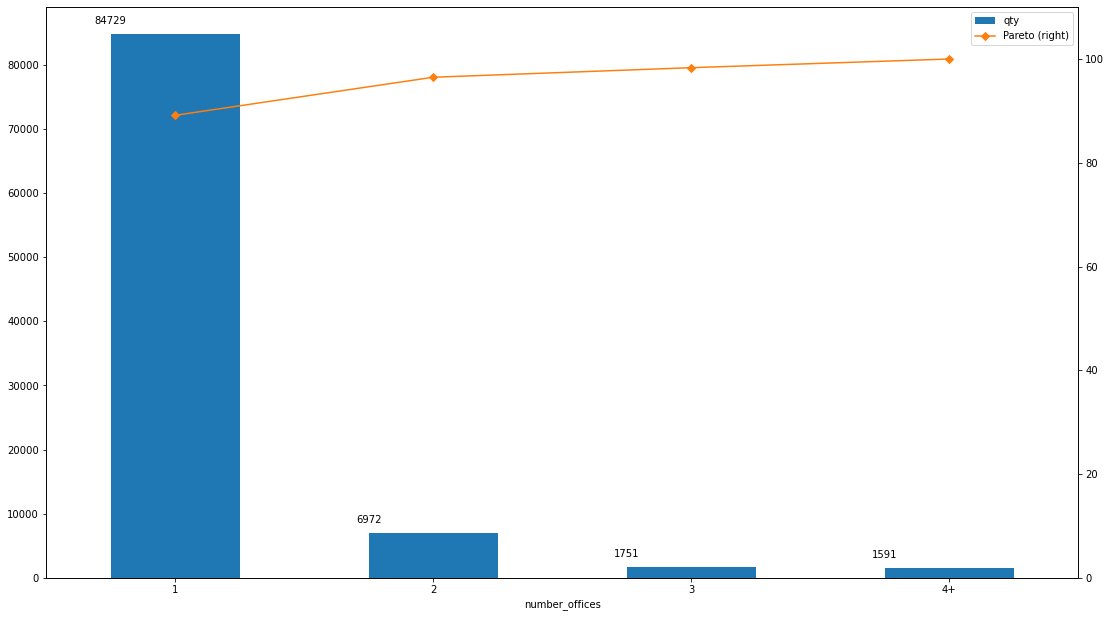

In [24]:
startups = offices[['object_id', 'office_id']]

startups = startups.groupby(startups['object_id'])['office_id'].count().reset_index().rename(
    columns={"office_id": 'number_offices'}).sort_values(by='number_offices', ascending=False)
startups.loc[(startups['number_offices']>3)] = '4+'


visualization(startups, x='number_offices', y='object_id', n=4, r=0, order='qty')

        

In [25]:
startups = offices[['object_id', 'office_id']]

startups = startups.groupby(startups['object_id'])['office_id'].count().reset_index().rename(
    columns={"office_id": 'number_offices'}).sort_values(by='number_offices', ascending=False)
startups.loc[(startups['number_offices']>3)] = '4+'

startups_c = startups.groupby(startups['number_offices'])['object_id'].count().reset_index().rename(columns={"object_id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['number_offices']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')


number_offices    qty      Pareto
number_offices                                  
1                           1  84729   89.148070
2                           2   6972   96.483697
3                           3   1751   98.326021
4+                         4+   1591  100.000000

**4.6 e 4.7 Análises sobre a formação dos integrantes das startups**

In [26]:
people_degree = people.merge(degrees, on='object_id')

#Dropando colunas desnecessárias

people_degree = people_degree.drop(['first_name', 'last_name', 'birthplace', 'id_y', 'graduated_at', 'created_at', 'updated_at'], axis=1)
people_degree = people_degree.drop_duplicates()



In [27]:
#Checando valores nulos
print(people_degree.isnull().sum())

id_x                    0
object_id               0
affiliation_name       12
degree_type         11103
subject             28047
institution            54
dtype: int64


In [28]:
#Corrigindo nome de instituições

people_degree.loc[people_degree['institution'].str.contains('harvard', case=False, na=False), 'institution'] = 'Harvard University'
people_degree.loc[people_degree['institution'].str.contains('stanford', case=False, na=False), 'institution'] = 'Stanford University'
people_degree.loc[people_degree['institution'].str.contains('university of california', case=False, na=False), 'institution'] = 'University of California'
people_degree.loc[people_degree['institution'].str.contains('mit', case=False, na=False), 'institution'] = 'MIT'
people_degree.loc[people_degree['institution'].str.contains('cornell', case=False, na=False), 'institution'] = 'Cornell University'
people_degree.loc[people_degree['institution'].str.contains('university of pennsylvania', case=False, na=False), 'institution'] = 'University of Pennsylvania'
people_degree.loc[people_degree['institution'].str.contains('university of michigan', case=False, na=False), 'institution'] = 'University of Michigan'
people_degree.loc[people_degree['institution'].str.contains('columbia', case=False, na=False), 'institution'] = 'Columbia University'
people_degree.loc[people_degree['institution'].str.contains('yale', case=False, na=False), 'institution'] = 'Yale University'
people_degree.loc[people_degree['institution'].str.contains('duke', case=False, na=False), 'institution'] = 'Duke University'
people_degree.loc[people_degree['institution'].str.contains('Northwestern University', case=False, na=False), 'institution'] = 'Northwestern University'
people_degree.loc[people_degree['institution'].str.contains('University of Chicago', case=False, na=False), 'institution'] = 'University of Chicago'
people_degree.loc[people_degree['institution'].str.contains('Dartmouth College', case=False, na=False), 'institution'] = 'Dartmouth College'
people_degree.loc[people_degree['institution'].str.contains('Carnegie Mellon University', case=False, na=False), 'institution'] = 'Carnegie Mellon University'
people_degree.loc[people_degree['institution'].str.contains('University of Virginia', case=False, na=False), 'institution'] = 'University of Virginia'
people_degree.loc[people_degree['institution'].str.contains('Tel Aviv University', case=False, na=False), 'institution'] = 'Tel Aviv University'
people_degree.loc[people_degree['institution'].str.contains('Boston University', case=False, na=False), 'institution'] = 'Boston University'
people_degree.loc[people_degree['institution'].str.contains('University of Oxford', case=False, na=False), 'institution'] = 'University of Oxford'
people_degree.loc[people_degree['institution'].str.contains('University of Washington', case=False, na=False), 'institution'] = 'University of Washington'
people_degree.loc[people_degree['institution'].str.contains('Princeton', case=False, na=False), 'institution'] = 'Princeton University'


#Corrigindo nome de subjects

people_degree.loc[people_degree['subject'].str.contains('Computer', case=False, na=False), 'subject'] = 'Computer Science/Computer Eng.'
people_degree.loc[people_degree['subject'].str.contains('Economics', case=False, na=False), 'subject'] = 'Economics/Business'
people_degree.loc[people_degree['subject'].str.contains('Business', case=False, na=False), 'subject'] = 'Economics/Business'
people_degree.loc[people_degree['subject'].str.contains('Administration', case=False, na=False), 'subject'] = 'Economics/Business'
people_degree.loc[people_degree['subject'].str.contains('Management', case=False, na=False), 'subject'] = 'Economics/Business'
people_degree.loc[people_degree['subject'].str.contains('Finance', case=False, na=False), 'subject'] = 'Economics/Business'
people_degree.loc[people_degree['subject'].str.contains('Accounting', case=False, na=False), 'subject'] = 'Economics/Business'
people_degree.loc[people_degree['subject'].str.contains('Engineer', case=False, na=False), 'subject'] = 'Engineering'
people_degree.loc[people_degree['subject'].str.contains('Physics', case=False, na=False), 'subject'] = 'Exact Sciences'
people_degree.loc[people_degree['subject'].str.contains('Chemistry', case=False, na=False), 'subject'] = 'Exact Sciences'
people_degree.loc[people_degree['subject'].str.contains('Mathematics', case=False, na=False), 'subject'] = 'Exact Sciences'
people_degree.loc[people_degree['subject'].str.contains('Advertising', case=False, na=False), 'subject'] = 'Marketing'
people_degree.loc[people_degree['subject'].str.contains('Marketing', case=False, na=False), 'subject'] = 'Marketing'
people_degree.loc[people_degree['subject'].str.contains('Law', case=False, na=False), 'subject'] = 'Law'




In [29]:
startups = people_degree[['object_id', 'institution']]

startups_c = startups.groupby(startups['institution'])['object_id'].count().reset_index().rename(columns={"object_id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['institution']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')



institution   qty     Pareto
institution                                                            
University of California      University of California  4530   4.167817
Stanford University                Stanford University  4061   7.904131
Harvard University                  Harvard University  4043  11.623884
University of Pennsylvania  University of Pennsylvania  2004  13.467660
Columbia University                Columbia University  1797  15.120986
MIT                                                MIT  1624  16.615144
Cornell University                  Cornell University  1145  17.668599
University of Michigan          University of Michigan  1137  18.714693
Northwestern University        Northwestern University  1127  19.751587
University of Chicago            University of Chicago   919  20.597111
Yale University                        Yale University   890  21.415954
Duke University                        Duke University   826  22.175913
Dartmouth College                    Dartmouth College   686  22.807066
University of Virginia          University of Virginia   677  23.429938
Boston University                    Boston University   661  24.038090
Princeton University              Princeton University   650  24.636121
Tel Aviv University                Tel Aviv University   643  25.227712
Carnegie Mellon University  Carnegie Mellon University   629  25.806422
University of Washington      University of Washington   566  26.327169
University of Oxford              University of Oxford   528  26.812954

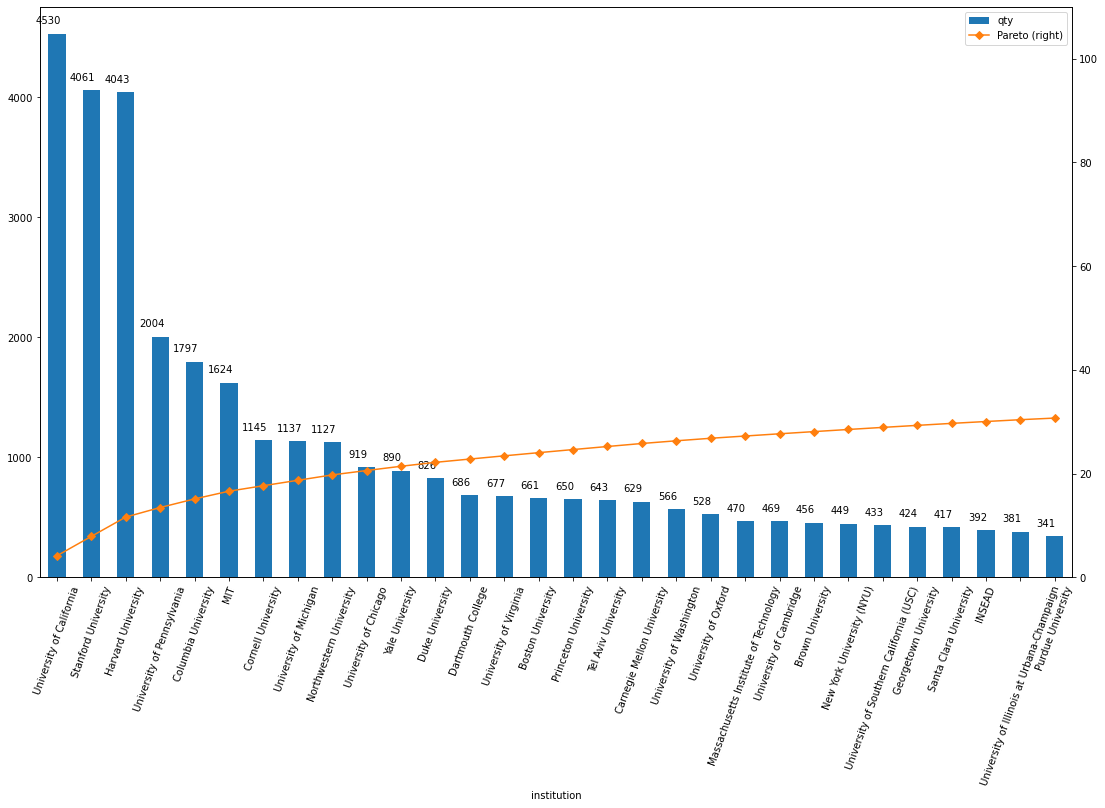

In [30]:
startups = people_degree[['object_id', 'institution']]


visualization(startups, x='institution', y='object_id', n=30, r=70, order='qty')


In [31]:
startups = people_degree[['object_id', 'degree_type']]

startups_c = startups.groupby(startups['degree_type'])['object_id'].count().reset_index().rename(columns={"object_id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['degree_type']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')


degree_type    qty     Pareto
degree_type                                           
BS                                BS  23232  23.793284
MBA                              MBA  15243  39.404553
BA                                BA  15227  54.999437
MS                                MS  11619  66.899151
PhD                              PhD   4027  71.023443
JD                                JD   1976  73.047183
Degree                        Degree   1685  74.772893
MA                                MA   1684  76.497578
BBA                              BBA   1655  78.192563
BE                                BE   1341  79.565961
MD                                MD    701  80.283897
BTECH                          BTECH    653  80.952674
Diploma                      Diploma    448  81.411497
BCOM                            BCOM    433  81.854958
BFA                              BFA    311  82.173472
LLB                              LLB    247  82.426440
MSE                              MSE    244  82.676335
MENG                            MENG    229  82.910867
Bachelors Degree  Bachelors Degree    229  83.145400
BENG                            BENG    206  83.356377

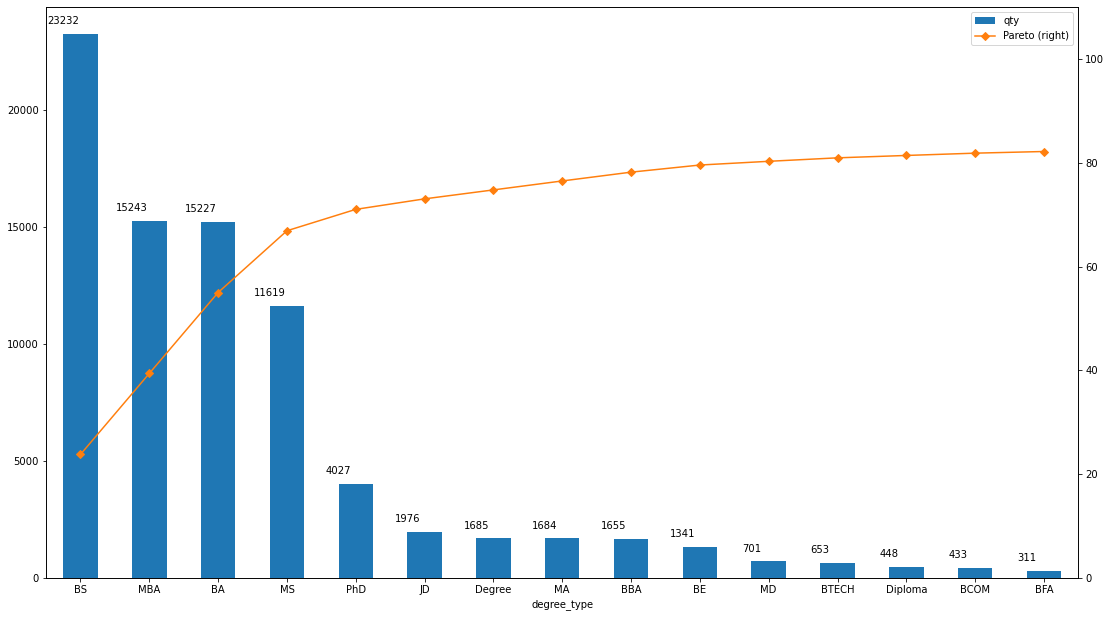

In [32]:
startups = people_degree[['object_id', 'degree_type']]


visualization(startups, x='degree_type', y='object_id', n=15, r=0, order='qty')


In [33]:
people_degree_sub = people_degree[~people_degree['subject'].isin(['MBA', 'Degree'])]

startups = people_degree_sub[['subject', 'object_id']]

startups_c = startups.groupby(startups['subject'])['object_id'].count().reset_index().rename(columns={"object_id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['subject']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')


subject    qty  \
subject                                                                 
Economics/Business                          Economics/Business  25079   
Computer Science/Computer Eng.  Computer Science/Computer Eng.  11145   
Engineering                                        Engineering  10155   
Exact Sciences                                  Exact Sciences   4266   
Marketing                                            Marketing   2572   
Law                                                        Law   1807   
Political Science                            Political Science    743   
Psychology                                          Psychology    557   
History                                                History    528   
English                                                English    503   
Biology                                                Biology    462   
Information Technology                  Information Technology    340   
Philosophy                                          Philosophy    311   
Entrepreneurship                              Entrepreneurship    292   
Communications                                  Communications    291   
Journalism                                          Journalism    254   
Medicine                                              Medicine    243   
International Relations                International Relations    234   
Information Systems                        Information Systems    207   
Commerce                                              Commerce    187   

                                   Pareto  
subject                                    
Economics/Business              31.614709  
Computer Science/Computer Eng.  45.664150  
Engineering                     58.465592  
Exact Sciences                  63.843332  
Marketing                       67.085608  
Law                             69.363521  
Political Science               70.300150  
Psychology                      71.002307  
History                         71.667906  
English                         72.301990  
Biology                         72.884390  
Information Technology          73.312996  
Philosophy                      73.705044  
Entrepreneurship                74.073140  
Communications                  74.439976  
Journalism                      74.760170  
Medicine                        75.066497  
International Relations         75.361478  
Information Systems             75.622424  
Commerce                        75.858157

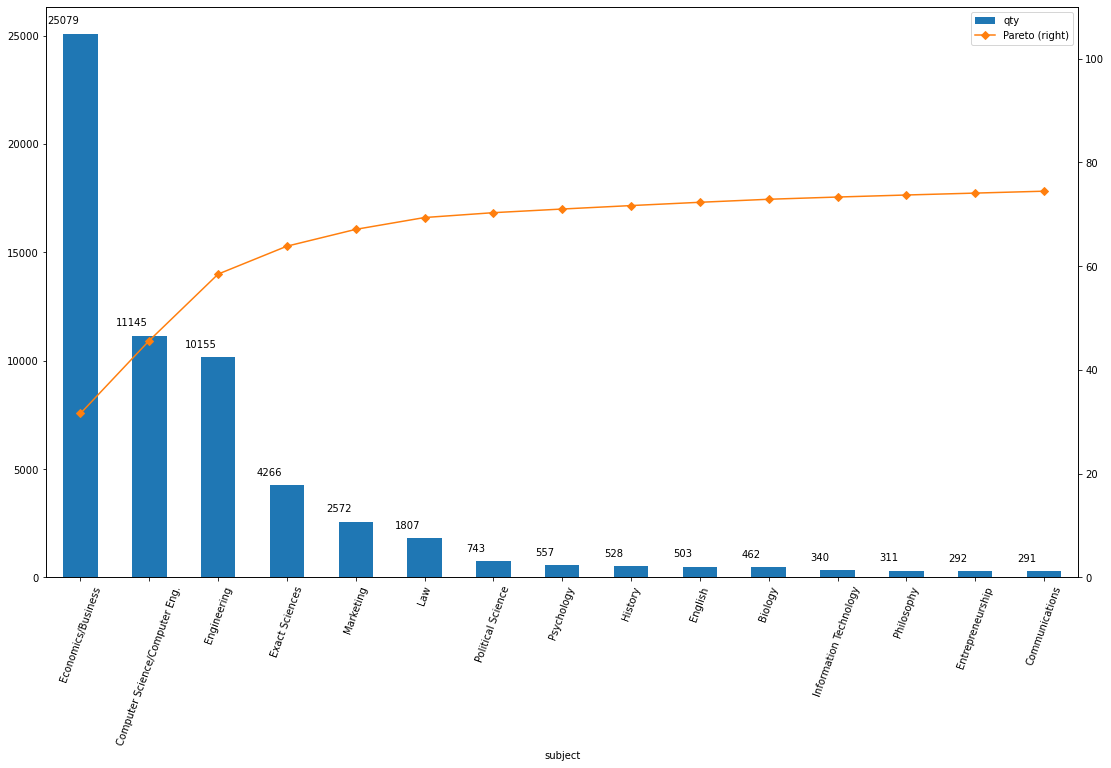

In [34]:
people_degree_sub = people_degree[~people_degree['subject'].isin(['MBA', 'Degree'])]

startups = people_degree_sub[['subject', 'object_id']]


visualization(startups, x='subject', y='object_id', n=15, r=70, order='qty')


In [35]:
people_degree_afill = people_degree[people_degree['affiliation_name'] != 'Unaffiliated']

startups = people_degree_afill[['affiliation_name', 'object_id']]

startups_c = startups.groupby(startups['affiliation_name'])['object_id'].count().reset_index().rename(columns={"object_id": 'qty'}).sort_values(by='qty', ascending=False)
startups_c.index = startups_c['affiliation_name']
startups_c['Pareto'] = 100 *startups_c.qty.cumsum() / startups_c.qty.sum()
startups_c.nlargest(20, 'qty')


affiliation_name  \
affiliation_name                                                                 
Google                                                                  Google   
Advent International                                      Advent International   
Yahoo!                                                                  Yahoo!   
Microsoft                                                            Microsoft   
Robert W. Baird & Co.                                    Robert W. Baird & Co.   
DuPont Capital Management                            DuPont Capital Management   
Knight Foundation                                            Knight Foundation   
Fort Washington Capital Partners Group  Fort Washington Capital Partners Group   
Comcast                                                                Comcast   
Business Growth Fund                                      Business Growth Fund   
McKinsey & Company                                          McKinsey & Company   
Facebook                                                              Facebook   
Amazon                                                                  Amazon   
Sands Capital Ventures                                  Sands Capital Ventures   
TechCrunch                                                          TechCrunch   
Apple                                                                    Apple   
MySpace                                                                MySpace   
Foresight Group                                                Foresight Group   
eBay                                                                      eBay   
Enhanced Capital Partners                            Enhanced Capital Partners   

                                        qty    Pareto  
affiliation_name                                       
Google                                  300  0.821108  
Advent International                    268  1.554631  
Yahoo!                                  181  2.050033  
Microsoft                               154  2.471535  
Robert W. Baird & Co.                   134  2.838296  
DuPont Capital Management               104  3.122947  
Knight Foundation                        97  3.388439  
Fort Washington Capital Partners Group   89  3.632034  
Comcast                                  82  3.856470  
Business Growth Fund                     75  4.061747  
McKinsey & Company                       72  4.258813  
Facebook                                 68  4.444931  
Amazon                                   64  4.620101  
Sands Capital Ventures                   63  4.792533  
TechCrunch                               60  4.956755  
Apple                                    52  5.099080  
MySpace                                  50  5.235932  
Foresight Group                          48  5.367309  
eBay                                     48  5.498686  
Enhanced Capital Partners                46  5.624589

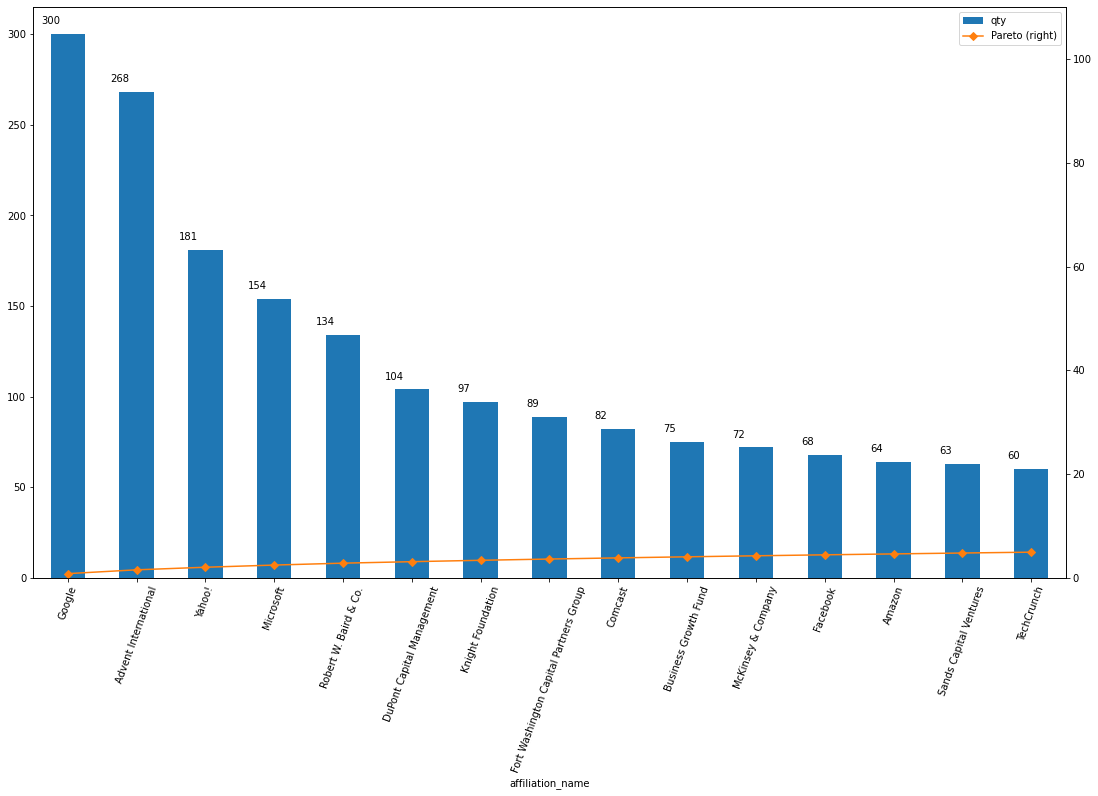

In [36]:
people_degree_afill = people_degree[people_degree['affiliation_name'] != 'Unaffiliated']

startups = people_degree_afill[['affiliation_name', 'object_id']]

visualization(startups, x='affiliation_name', y='object_id', n=15, r=70, order='qty')


**4.8 Funil: quantos passaram pra seed, séries, etc**

In [37]:
# Combinando os datasets necessários

df_funding = df_objects.merge(funding_rounds, left_on='id', right_on='object_id')

df_funding = df_funding[['object_id','name','founded_at','funded_at','funding_round_type','funding_round_code', 
                         'raised_amount_usd','is_first_round', 'is_last_round', 'participants', 'funding_total_usd']]

df_funding.drop_duplicates(inplace=True)


In [38]:
df_funding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52554 entries, 0 to 52625
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   object_id           52554 non-null  object 
 1   name                52554 non-null  object 
 2   founded_at          43128 non-null  object 
 3   funded_at           52311 non-null  object 
 4   funding_round_type  52554 non-null  object 
 5   funding_round_code  52554 non-null  object 
 6   raised_amount_usd   52554 non-null  float64
 7   is_first_round      52554 non-null  int64  
 8   is_last_round       52554 non-null  int64  
 9   participants        52554 non-null  int64  
 10  funding_total_usd   52554 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.8+ MB


In [39]:
#Checando campos nulos 

print(df_funding.isnull().sum())

object_id                0
name                     0
founded_at            9426
funded_at              243
funding_round_type       0
funding_round_code       0
raised_amount_usd        0
is_first_round           0
is_last_round            0
participants             0
funding_total_usd        0
dtype: int64


**Relationships, participants and funding**

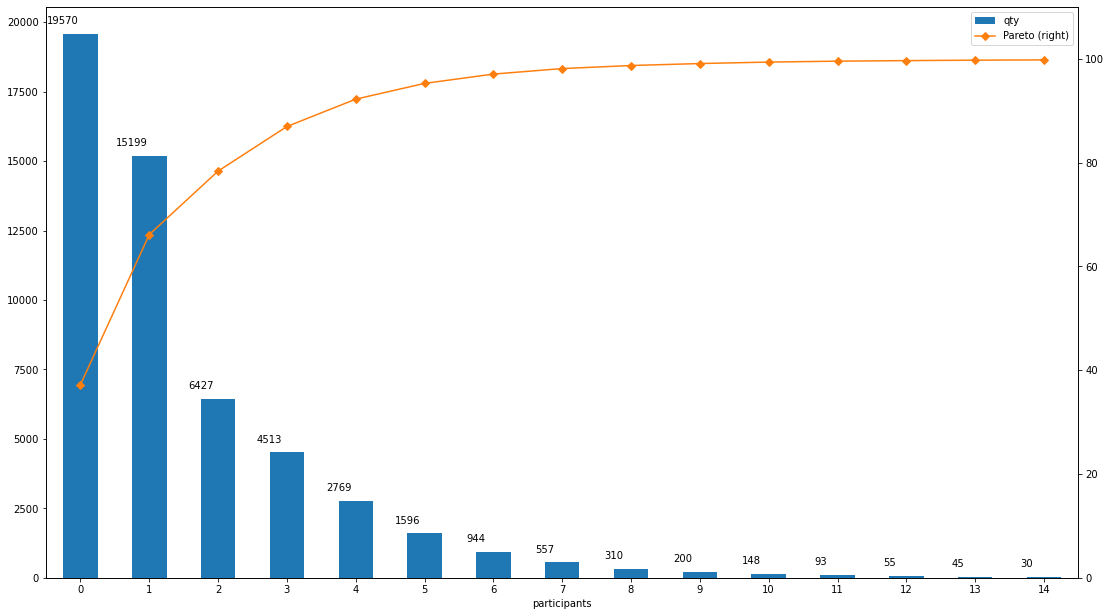

In [40]:
startups = df_funding[['object_id', 'participants']]

visualization(startups, x='participants', y='object_id', n=15, r=0, order='qty')

**Funil**

In [41]:
df_rounds = df_funding[['funding_round_type']].value_counts().reset_index(name='number')

df_rounds["Total startups with rounds"] = df_funding["object_id"].nunique()

df_rounds = df_rounds[~((df_rounds['funding_round_type'] == 'angel') | 
                        (df_rounds['funding_round_type'] == 'crowdfunding') | 
                        (df_rounds['funding_round_type'] == 'other'))]

df_rounds["Percentual"] = df_rounds['number']/df_rounds['Total startups with rounds']*100

print(df_rounds)

  funding_round_type  number  Total startups with rounds  Percentual
0            venture   15259                       31707   48.125020
2           series-a    9809                       31707   30.936386
3           series-b    4858                       31707   15.321538
4          series-c+    4196                       31707   13.233671
6     private-equity    1043                       31707    3.289494
8           post-ipo      85                       31707    0.268080


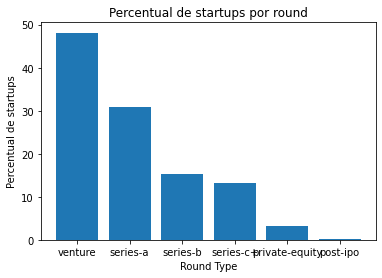

In [42]:
df_rounds = df_funding[['funding_round_type']].value_counts().reset_index(name='number')

df_rounds["Total startups with rounds"] = df_funding["object_id"].nunique()

df_rounds = df_rounds[~((df_rounds['funding_round_type'] == 'angel') | 
                        (df_rounds['funding_round_type'] == 'crowdfunding') | 
                        (df_rounds['funding_round_type'] == 'other'))]

df_rounds["Percentual"] = df_rounds['number']/df_rounds['Total startups with rounds']*100

#print(df_rounds)

xaxis = df_rounds['funding_round_type']
yaxis = df_rounds["Percentual"]

plt.bar(xaxis, yaxis)
plt.title('Percentual de startups por round')
plt.xlabel('Round Type')
plt.ylabel('Percentual de startups')
plt.show()

#Transformar em um gráfico de barras laterais


In [43]:
df_rounds_raised = (df_funding
                    .groupby(['object_id', 'funding_round_type'])['raised_amount_usd']
                    .sum()
                    .reset_index(name='raised')
                   )


fig = px.box(df_rounds_raised, x="funding_round_type", y="raised")
fig.show()

In [44]:
df_rounds_raised = (df_funding[df_funding.funding_round_code.isin(['seed'])]
                    .groupby(['object_id'])['raised_amount_usd']
                    .sum()
                    .reset_index(name='raised')
                   )


has_series_a = (df_funding[df_funding.funding_round_code.isin(['a'])])

raised_pre_series_a = (df_rounds_raised
                       .merge(has_series_a, on='object_id', how='left')
                      )

raised_pre_series_a.loc[raised_pre_series_a['funding_round_code']=='a', 'has_series_a'] = 1

raised_pre_series_a[['has_series_a']] = raised_pre_series_a[['has_series_a']].fillna(0)

raised_pre_series_a.loc[raised_pre_series_a['raised'] == 0, 'raised_amount_range'] = '00. 0'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] < 25000) & (raised_pre_series_a['raised'] > 0), 'raised_amount_range'] = '01. 1 - 25K'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] <= 500000)  & (raised_pre_series_a['raised']>25000), 'raised_amount_range'] = '02. 25K - 500K'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] <= 1500000) & (raised_pre_series_a['raised']>500000), 'raised_amount_range'] = '04. 1M - 1.5M'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] <= 2500000) & (raised_pre_series_a['raised']>1500000), 'raised_amount_range'] = '06. 2M - 2.5M'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] <= 3500000) & (raised_pre_series_a['raised']>2500000), 'raised_amount_range'] = '08. 3M - 3.5M'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] <= 4500000) & (raised_pre_series_a['raised']>3500000), 'raised_amount_range'] = '10. 4M - 4.5M'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] <= 5500000) & (raised_pre_series_a['raised']>4500000), 'raised_amount_range'] = '12. 5M - 5.5M'
raised_pre_series_a.loc[(raised_pre_series_a['raised'] > 6500000), 'raised_amount_range'] = '14. > 6.5M'

raised_psa = raised_pre_series_a[['raised_amount_range', 'has_series_a', 'object_id']]

raised_psa['total'] = (raised_pre_series_a 
                      .groupby('raised_amount_range')['object_id']
                      .transform('count')                      
             )

raised_psa['has_series_a_total'] = (raised_pre_series_a 
                      .groupby(['raised_amount_range', 'has_series_a'])['object_id']
                      .transform('count')                      
             )

raised_psa['%_series_a'] = (raised_psa.has_series_a_total/raised_psa.total*100).round(1)
                                            

raised_psa.drop('object_id', axis=1, inplace=True)

raised_psa = (raised_psa[raised_psa.has_series_a == 1])

raised_psa.reset_index(drop=True, inplace=True)
raised_psa = raised_psa.drop_duplicates().sort_values('raised_amount_range')


In [45]:
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=raised_psa['raised_amount_range'], y=raised_psa['%_series_a'], name="% in series A", mode="lines"),
    secondary_y=True
)

fig.add_trace(
    go.Bar(x=raised_psa['raised_amount_range'], y=raised_psa['total'], name="Startups"),
    secondary_y=False
)

fig.update_xaxes(title_text="Letter")

# Set y-axes titles
fig.update_yaxes(title_text="Startups", secondary_y=False)
fig.update_yaxes(title_text="% in series A", secondary_y=True)

fig.show()


**4.9 % por status (operando, fechada, adquirida)**

In [46]:
df_objects['status'].value_counts()

operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64

In [47]:
# Juntando os datasets necessários

df = df_objects.merge(investments, left_on='id', right_on='funded_object_id')

In [48]:
df_status = df.filter(['funded_object_id', 'status'])

df_status.drop_duplicates(inplace=True)

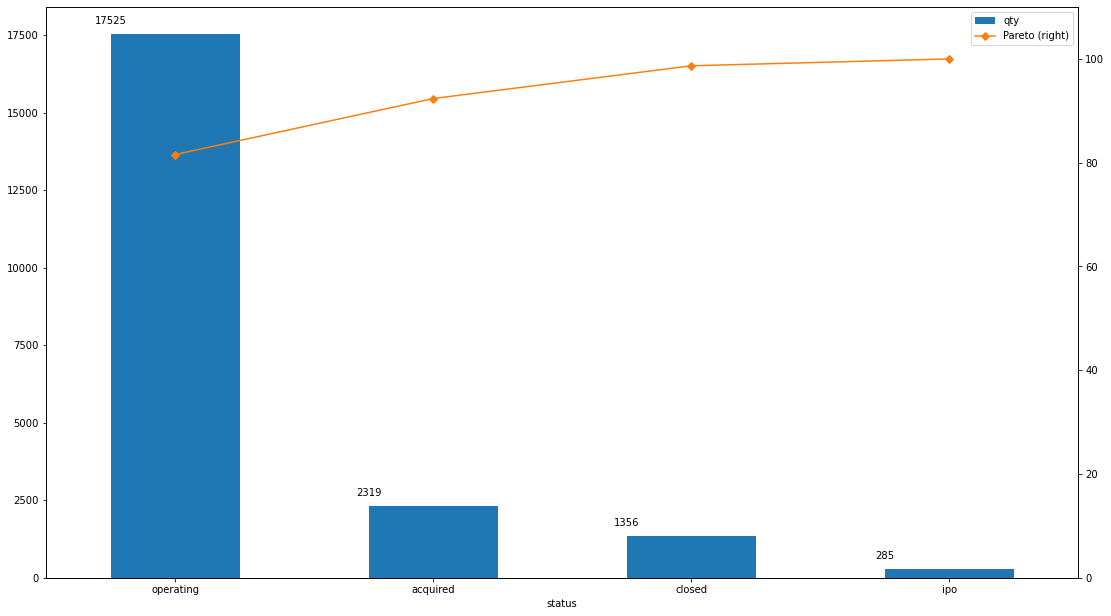

In [49]:
visualization(df_status, x='status', y='funded_object_id', n=15, r=0, order='qty')


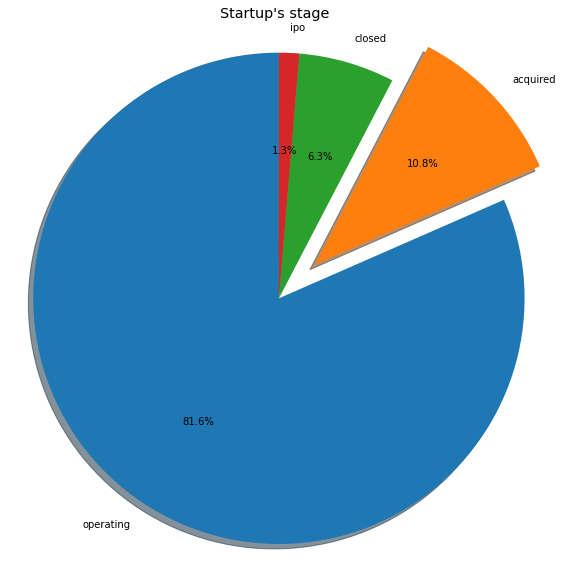

In [50]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rcParams['figure.figsize'] = 10,10
labels = df_status['status'].value_counts().index.tolist()
sizes = df_status['status'].value_counts().tolist()
explode = (0, 0.2, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Startup's stage", fontdict=None, position= [0.48,1], size = 'x-large')

plt.show()